In [1]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
scaler = joblib.load('rul_scaler.pk1')
model = joblib.load('rf_rul_model.pk1')
test_df = pd.read_csv('test_data.csv')
feature_cols = ['HPT_eff_mod', 'hs', 'Fc', 'P2', 'P50']
target_col = 'RUL'
x_test = test_df[feature_cols]
y_test = test_df[target_col]
x_test_scaled = scaler.transform(x_test)
y_pred = model.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")

Test MAE: 9.43
Test RMSE: 11.82
Test R² Score: 0.77


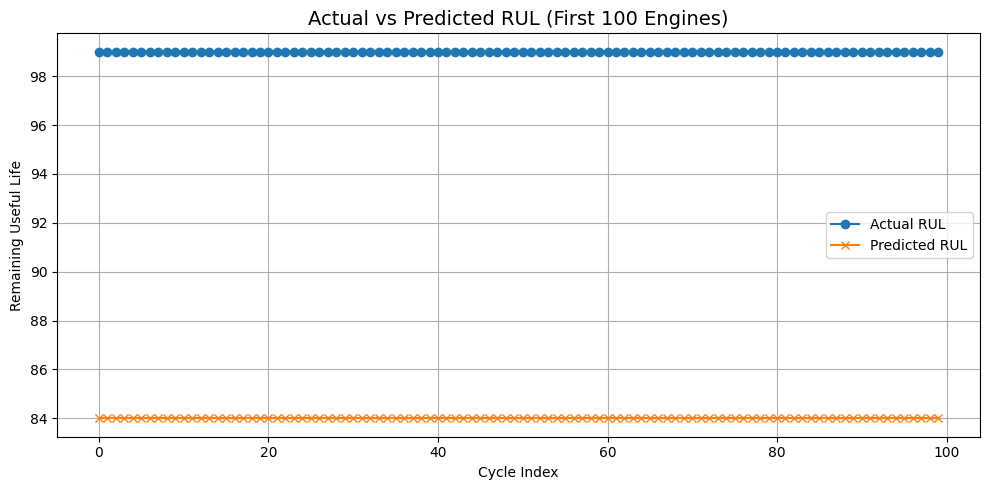

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual RUL', marker='o')
plt.plot(y_pred[:100], label='Predicted RUL', marker='x')
plt.title('Actual vs Predicted RUL (First 100 Engines)', fontsize=14)
plt.xlabel('Cycle Index')
plt.ylabel('Remaining Useful Life')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

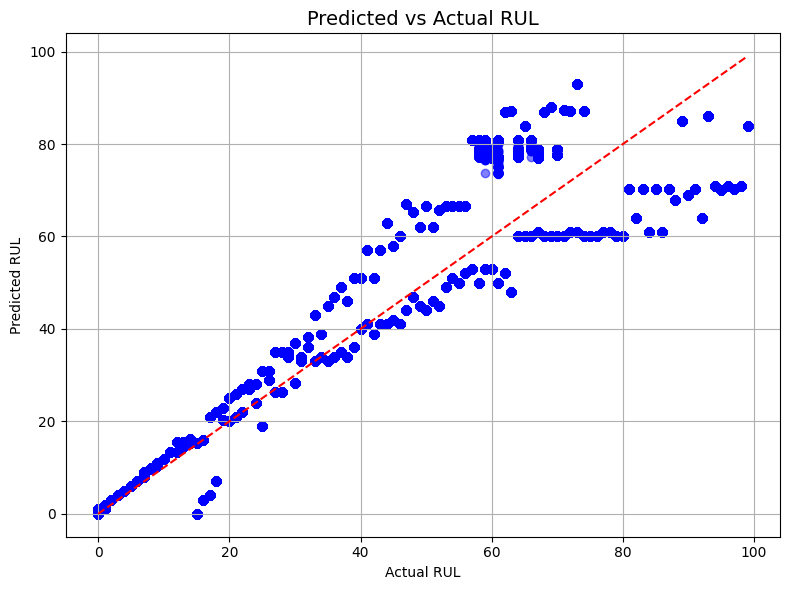

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual RUL', fontsize=14)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.grid(True)
plt.tight_layout()
plt.show()

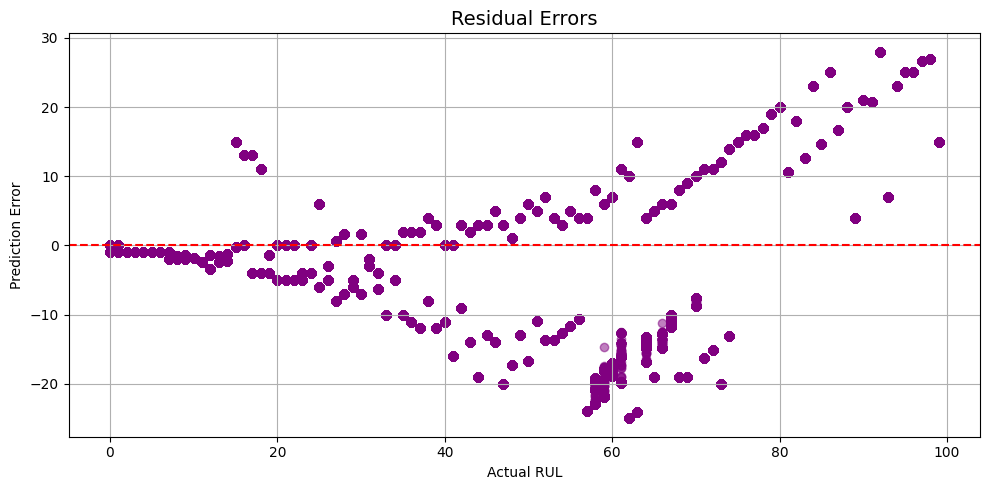

In [5]:
residuals = y_test.values - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_test.values, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Errors', fontsize=14)
plt.xlabel('Actual RUL')
plt.ylabel('Prediction Error')
plt.grid(True)
plt.tight_layout()
plt.show()